In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

# Verificar si CUDA (GPU) está disponible
if torch.cuda.is_available():
    # Obtener el dispositivo actual
    device = torch.cuda.current_device()
    print(f"PyTorch está utilizando la GPU: {torch.cuda.get_device_name(device)}")
else:
    print("PyTorch está utilizando la CPU")

PyTorch está utilizando la GPU: NVIDIA GeForce GTX 1060


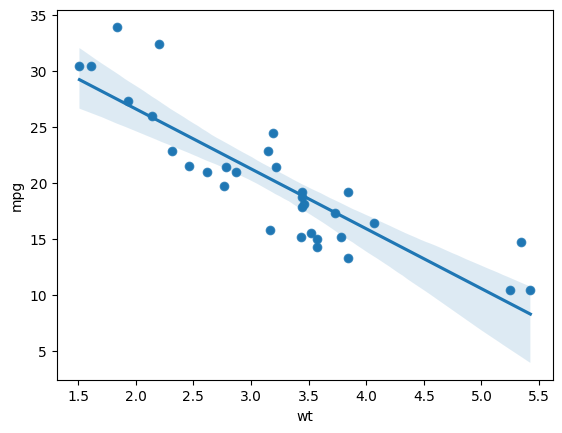

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

X_list = cars.wt.values
y_list = cars.mpg.values

X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)

X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

In [3]:
# creating a class for the model in order to use in a comfortabe way 
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)

Esto es importante, LinearRegressionTorch es una subclase de nn.Module (como una herencia). 
la línea super(LinearRegressionTorch, self).__init__() se utiliza para asegurar que la instancia de la clase base se inicializa 
antes que la clase derivada. 
Es por esta relación base-derivada que en el siguiente code snippet se puede instanciar el método parameters que le pertenece a la clase base 

In [5]:
# hyperparameter definition
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
losses, slope, bias = [], [], []
NUM_EPOCHS = 10000
BATCH_SIZE = 2

loss_fun = nn.MSELoss()

for epoch in range(NUM_EPOCHS):
    for i in range(0, X.shape[0], BATCH_SIZE):
        # set gradients to zero
        optimizer.zero_grad()

        # forward pass
        y_pred = model.forward(X[i:i+BATCH_SIZE])

        # calculate loss
        loss = loss_fun(y_pred, y_true[i:i+BATCH_SIZE])
        loss.backward()

        # update parameters
        optimizer.step()

        # get parameters
        for name, param in model.named_parameters():
            if param.requires_grad:
                if name == 'linear.weight':
                    slope.append(param.data.numpy()[0][0])
                if name == 'linear.bias':
                    bias.append(param.data.numpy()[0])

        # store loss
        losses.append(float(loss.data))
        # print loss
        if (epoch % 100 == 0):
            # store loss
            print(f"Epoch {epoch}, Loss: {loss.data}")

print(len(range(NUM_EPOCHS)))
print(len(losses))

sns.scatterplot(x=range(len(losses)), y=losses)
sns.scatterplot(x=range(NUM_EPOCHS), y=bias, color='green') # visualise the bias development
sns.scatterplot(x=range(NUM_EPOCHS), y=slope, color='blue') # visualise the slope development


Epoch 0, Loss: 0.5332000255584717
Epoch 0, Loss: 4.947558403015137
Epoch 0, Loss: 0.6891730427742004
Epoch 0, Loss: 17.04454231262207
Epoch 0, Loss: 4.217292785644531
Epoch 0, Loss: 1.18093740940094
Epoch 0, Loss: 2.120134115219116
Epoch 0, Loss: 4.988480567932129
Epoch 0, Loss: 27.33087158203125
Epoch 0, Loss: 10.0820894241333
Epoch 0, Loss: 44.930362701416016
Epoch 0, Loss: 25.71828842163086
Epoch 0, Loss: 8.625761032104492
Epoch 0, Loss: 1.1395920515060425
Epoch 0, Loss: 15.131628036499023
Epoch 0, Loss: 1.409427285194397
Epoch 100, Loss: 0.5332000255584717
Epoch 100, Loss: 4.947558403015137
Epoch 100, Loss: 0.6891730427742004
Epoch 100, Loss: 17.04454231262207
Epoch 100, Loss: 4.217292785644531
Epoch 100, Loss: 1.18093740940094
Epoch 100, Loss: 2.120134115219116
Epoch 100, Loss: 4.988480567932129
Epoch 100, Loss: 27.33087158203125
Epoch 100, Loss: 10.0820894241333
Epoch 100, Loss: 44.930362701416016
Epoch 100, Loss: 25.71828842163086
Epoch 100, Loss: 8.625761032104492
Epoch 100, Lo

<Axes: >

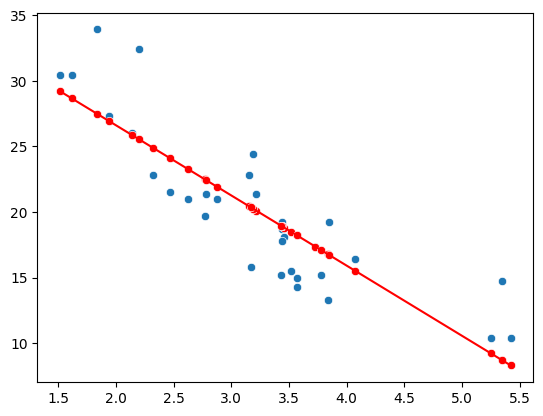

In [ ]:
# check the result 
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_list, y=y_list)
sns.scatterplot(x=X_list, y=y_pred, color='red')
sns.lineplot(x=X_list, y=y_pred, color='red')